# Feature Selection in Water Quality dataset for classification

#### Shashank D      `181CO248`
#### Tarun S Anur    `181CO255`

In [260]:
%matplotlib inline
import pandas as pd
import numpy as np

## Read the dataset from the excel sheet

In [261]:
data = pd.read_excel('water_quality_dataset.xlsx', sheet_name='RapidMiner Data', usecols="C:Q", nrows=88)
data.head()

,Mg,PH,K(Potassium),NITRATE,SULPHATE,EC(Electrical Conductivity),Ca(Calcium),Na(Sodium),CARBONATE,BICARBONATE,CHLORIDE,FLUORIDE,SAR(Sodium Absorption Ratio),RSC(Residual Sodium Carbonate,water Quality(A/B/C/D/E)
0,267.95,7.28,10.0,276.0,304.0,5730,16.0,850,0,878.0,1304.0,1.64,10.94,-8.45,E
1,94.85,7.18,3.0,2.0,12.0,1069,24.0,77,0,421.0,163.0,1.34,1.58,-2.10,A
2,226.14,7.48,0.0,16.0,150.0,2830,20.0,300,0,549.0,631.0,0.99,4.17,-10.60,E
3,211.55,7.34,5.0,140.0,264.0,3600,20.0,500,0,726.0,680.0,1.65,7.17,-6.50,E
4,238.30,7.22,2.0,174.0,240.0,2300,24.0,152,0,537.0,305.0,1.21,2.05,-12.00,E


# Preprocessing

## Shift negative values to positive side

In [262]:
data['RSC(Residual Sodium Carbonate'] = data['RSC(Residual Sodium Carbonate'] - pd.DataFrame.min(data['RSC(Residual Sodium Carbonate'])
data.describe()

,Mg,PH,K(Potassium),NITRATE,SULPHATE,EC(Electrical Conductivity),Ca(Calcium),Na(Sodium),CARBONATE,BICARBONATE,CHLORIDE,FLUORIDE,SAR(Sodium Absorption Ratio),RSC(Residual Sodium Carbonate
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,94.135089,7.683078,61.097427,22.434025,159.811496,2406.261364,100.642684,289.965909,4.750000,409.433644,482.641104,0.871853,4.779150,29.095838
std,76.780583,0.435190,73.617429,51.948068,133.507601,1757.151584,84.905110,260.322675,14.952223,181.804402,505.067125,0.442557,3.424933,7.498522
min,0.000000,6.820000,0.000000,0.000000,3.000000,346.000000,2.000000,20.000000,0.000000,98.000000,25.000000,0.020000,0.470000,0.000000
25%,35.965000,7.377500,3.000000,2.750000,57.250000,995.250000,39.000000,103.250000,0.000000,268.000000,113.000000,0.509000,2.342500,25.425000
50%,75.025000,7.605000,40.000000,10.000000,169.626593,2090.000000,80.000000,271.000000,0.000000,402.462302,339.000000,0.988176,4.622381,30.655000
75%,113.745000,7.812500,70.759255,18.079712,172.219945,3090.000000,123.500000,352.500000,4.000000,499.750000,588.250000,1.100000,5.697500,34.620000
max,350.140000,8.860000,315.000000,350.000000,744.000000,7440.000000,520.000000,1300.000000,96.000000,970.000000,2183.000000,2.280000,16.750000,40.880000


## Make the class label a integer

In [263]:
target_column = 'water Quality(A/B/C/D/E)'
data[target_column] = data[target_column].apply(lambda x: ord(x) - ord('A'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Mg                             88 non-null     float64
 1   PH                             88 non-null     float64
 2   K(Potassium)                   88 non-null     float64
 3   NITRATE                        88 non-null     float64
 4   SULPHATE                       88 non-null     float64
 5   EC(Electrical Conductivity)    88 non-null     int64  
 6   Ca(Calcium)                    88 non-null     float64
 7   Na(Sodium)                     88 non-null     int64  
 8   CARBONATE                      88 non-null     int64  
 9   BICARBONATE                    88 non-null     float64
 10  CHLORIDE                       88 non-null     float64
 11  FLUORIDE                       88 non-null     float64
 12  SAR(Sodium Absorption Ratio)   88 non-null     float

In [264]:
X = data.iloc[:,:-1]  # independent columns
Y = data.iloc[:,-1]   # target column

# Univariate Selection

In [265]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [266]:
# print 14 best features according to the score function
def print_k_best(dfcolumns, dfscores):
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Attribute','Score']  # naming the dataframe columns
    featureScores = featureScores[featureScores[['Attribute', 'Score']].notnull().all(1)]
    featureScores.sort_values(by=['Score'], ascending=False, inplace=True)
    return featureScores  

## Chi-Square method

In [267]:
# apply SelectKBest class to extract top 14 best features
bestfeatures = SelectKBest(score_func=chi2, k=14)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
print_k_best(dfcolumns, dfscores)

,Attribute,Score
5,EC(Electrical Conductivity),74115.240056
10,CHLORIDE,26284.765414
7,Na(Sodium),8609.395626
0,Mg,3620.603267
9,BICARBONATE,3053.287567
3,NITRATE,2305.087709
4,SULPHATE,1781.590522
6,Ca(Calcium),1141.541445
2,K(Potassium),720.653858
8,CARBONATE,421.435887


## G-Test feature Selection

In [268]:


def _g_test(f_obs, f_exp):
    f_obs = np.asarray(f_obs, dtype=np.float64)

    k = len(f_obs)
    temp_val = f_obs
  
    with np.errstate(invalid="ignore"):
        temp_val /= f_exp
    
    temp_val = np.log(temp_val)
    temp_val *= 2
    temp_val *= f_obs
    temp_val = temp_val.sum(axis=0)
    return temp_val, special.chdtrc(k - 1, temp_val)


def g_test(X, y):
    
    X = check_array(X, accept_sparse='csr')
    if np.any((X.data if issparse(X) else X) < 0):
        raise ValueError("Input X must be non-negative.")

    Y = LabelBinarizer().fit_transform(y)
    if Y.shape[1] == 1:
        Y = np.append(1 - Y, Y, axis=1)

    observed = safe_sparse_dot(Y.T, X)          # n_classes * n_features

    feature_count = X.sum(axis=0).reshape(1, -1)
    class_prob = Y.mean(axis=0).reshape(1, -1)
    expected = np.dot(class_prob.T, feature_count)

    return _g_test(observed, expected)


In [269]:
import numpy as np

from scipy import special, stats
from scipy.sparse import issparse

from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import (as_float_array, check_array, check_X_y, safe_sqr,
                     safe_mask)
from sklearn.utils.extmath import safe_sparse_dot, row_norms
from sklearn.utils.validation import check_is_fitted





class Gtest_best_features(BaseEstimator):
    def __init__(self, score_func=g_test, *, k=10):
        self.k = k
        self.score_func = score_func

    def fit(self, X, y):
        X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc'],
                                   multi_output=True)

        if not callable(self.score_func):
            raise TypeError("The score function should be a callable, %s (%s) "
                            "was passed."
                            % (self.score_func, type(self.score_func)))

        self._check_params(X, y)
        score_func_ret = self.score_func(X, y)
        if isinstance(score_func_ret, (list, tuple)):
            self.scores_, self.pvalues_ = score_func_ret
            self.pvalues_ = np.asarray(self.pvalues_)
        else:
            self.scores_ = score_func_ret
            self.pvalues_ = None

        self.scores_ = np.asarray(self.scores_)

        return self

    def _check_params(self, X, y):
        if not (self.k == "all" or 0 <= self.k <= X.shape[1]):
            raise ValueError("k should be >=0")

 

In [270]:
bestfeatures = Gtest_best_features()
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
print_k_best(dfcolumns, dfscores)

,Attribute,Score
3,NITRATE,5.168294
10,CHLORIDE,4.009121
5,EC(Electrical Conductivity),2.993360
0,Mg,2.669468
7,Na(Sodium),2.658597
2,K(Potassium),2.409474
4,SULPHATE,2.136053
12,SAR(Sodium Absorption Ratio),1.753163
6,Ca(Calcium),1.243513
9,BICARBONATE,0.739006


## f_classif method

In [271]:
bestfeatures = SelectKBest(score_func=f_classif, k=14)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
print_k_best(dfcolumns, dfscores)

,Attribute,Score
0,Mg,41.102340
5,EC(Electrical Conductivity),40.990369
10,CHLORIDE,27.688830
13,RSC(Residual Sodium Carbonate,16.669395
9,BICARBONATE,15.958355
7,Na(Sodium),15.238371
12,SAR(Sodium Absorption Ratio),7.396511
3,NITRATE,5.861451
4,SULPHATE,4.666620
6,Ca(Calcium),4.653511


## mutual_info_classif method

In [272]:
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=14)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
print_k_best(dfcolumns, dfscores)

,Attribute,Score
5,EC(Electrical Conductivity),0.594456
10,CHLORIDE,0.477890
0,Mg,0.454978
7,Na(Sodium),0.431239
13,RSC(Residual Sodium Carbonate,0.388491
9,BICARBONATE,0.276833
1,PH,0.263568
4,SULPHATE,0.213848
6,Ca(Calcium),0.195318
12,SAR(Sodium Absorption Ratio),0.163025


## Feature importances using Extra Randomized tree classifer

In [273]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [274]:
model = ExtraTreesClassifier()
_ = model.fit(X,Y)

In [275]:
print("Feature's importance values according to ExtraTreeClassifier\n")
for i in range(len(X.columns)):
    l = len(str(X.columns[i]))
    print(X.columns[i], (29 - l)*' ', ":", round(model.feature_importances_[i]*100, 2))

Feature's importance values according to ExtraTreeClassifier

Mg                             : 9.1
PH                             : 6.53
K(Potassium)                   : 4.79
NITRATE                        : 4.39
SULPHATE                       : 3.83
EC(Electrical Conductivity)    : 16.6
Ca(Calcium)                    : 5.55
Na(Sodium)                     : 8.69
CARBONATE                      : 3.58
BICARBONATE                    : 7.37
CHLORIDE                       : 12.41
FLUORIDE                       : 4.44
SAR(Sodium Absorption Ratio)   : 5.81
RSC(Residual Sodium Carbonate  : 6.91


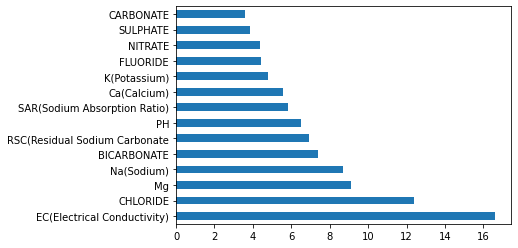

In [276]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_*100, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

## Sequential Features Selector (forward selection)

In [277]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
sfs = SequentialFeatureSelector(clf, n_features_to_select=7)
sfs.fit(X, Y)
isfeatureselected = sfs.get_support(indices=False)

featureScores = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(isfeatureselected)],axis=1)
featureScores.columns = ['Attribute','is Selected?']
featureScores


,Attribute,is Selected?
0,Mg,True
1,PH,True
2,K(Potassium),True
3,NITRATE,False
4,SULPHATE,True
5,EC(Electrical Conductivity),True
6,Ca(Calcium),False
7,Na(Sodium),True
8,CARBONATE,False
9,BICARBONATE,False


## Sequential Features Selector (backward selection)

In [278]:
clf = DecisionTreeClassifier()
sfs = SequentialFeatureSelector(clf, n_features_to_select=7, direction='backward')
sfs.fit(X, Y)
isfeatureselected = sfs.get_support(indices=False)

featureScores = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(isfeatureselected)],axis=1)
featureScores.columns = ['Attribute','is Selected?']
featureScores

,Attribute,is Selected?
0,Mg,False
1,PH,False
2,K(Potassium),False
3,NITRATE,True
4,SULPHATE,True
5,EC(Electrical Conductivity),True
6,Ca(Calcium),False
7,Na(Sodium),True
8,CARBONATE,True
9,BICARBONATE,False


## Sequential Features Selector using KNN estimator (forward selection)

In [279]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7)
sfs = SequentialFeatureSelector(clf, n_features_to_select=8)
sfs.fit(X, Y)
isfeatureselected = sfs.get_support(indices=False)

featureScores = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(isfeatureselected)],axis=1)
featureScores.columns = ['Attribute','is Selected?']
featureScores

,Attribute,is Selected?
0,Mg,True
1,PH,True
2,K(Potassium),False
3,NITRATE,True
4,SULPHATE,False
5,EC(Electrical Conductivity),False
6,Ca(Calcium),False
7,Na(Sodium),True
8,CARBONATE,True
9,BICARBONATE,False


## Recursive Feature Elimination with Decision Tree estimator

In [280]:
from sklearn.feature_selection import RFE

clf = DecisionTreeClassifier()

selector = RFE(clf, n_features_to_select=7)
selector = selector.fit(X, Y)
ranks = selector.ranking_


featureRanks = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(ranks)],axis=1)
featureRanks.columns = ['Attribute','Rank']
featureRanks.sort_values(by=['Rank'])


,Attribute,Rank
0,Mg,1
1,PH,1
5,EC(Electrical Conductivity),1
9,BICARBONATE,1
10,CHLORIDE,1
12,SAR(Sodium Absorption Ratio),1
13,RSC(Residual Sodium Carbonate,1
8,CARBONATE,2
6,Ca(Calcium),3
11,FLUORIDE,4


## Correlation co-efficients analysis

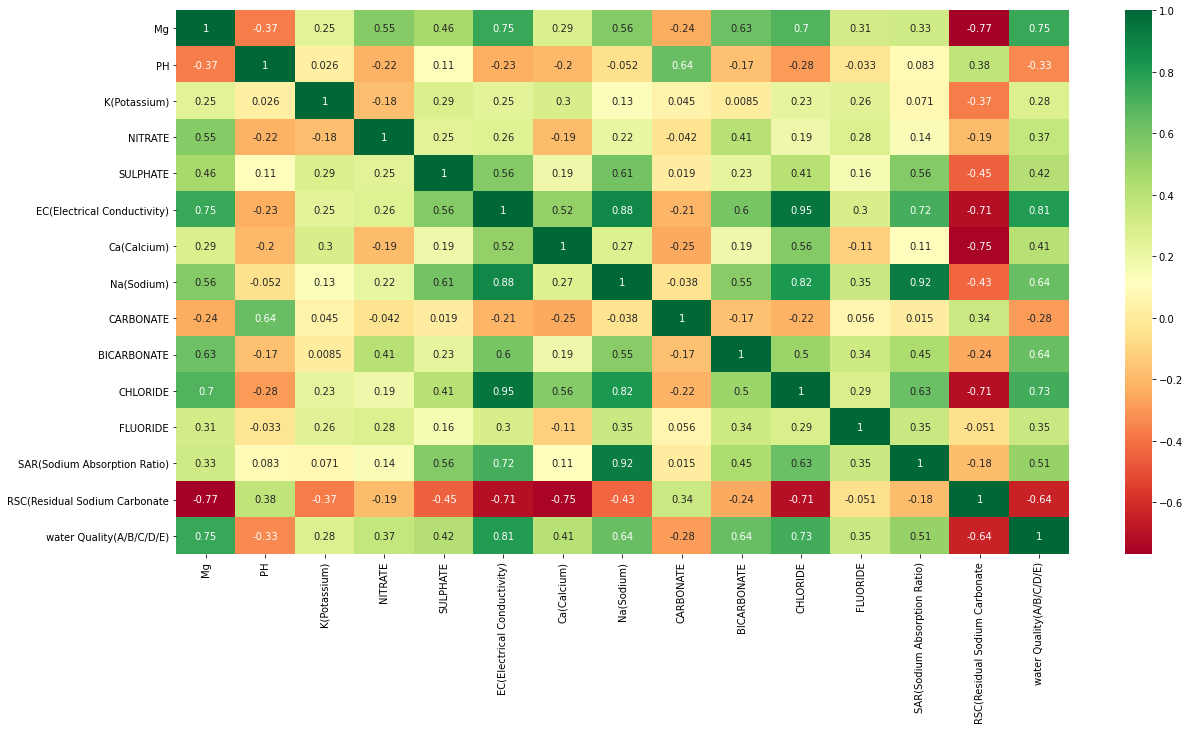

In [281]:
# plot heat map of correlation
import seaborn as sns
plt.figure(figsize=(20,10))
corr = data.corr()
g = sns.heatmap(corr ,annot=True,cmap="RdYlGn")

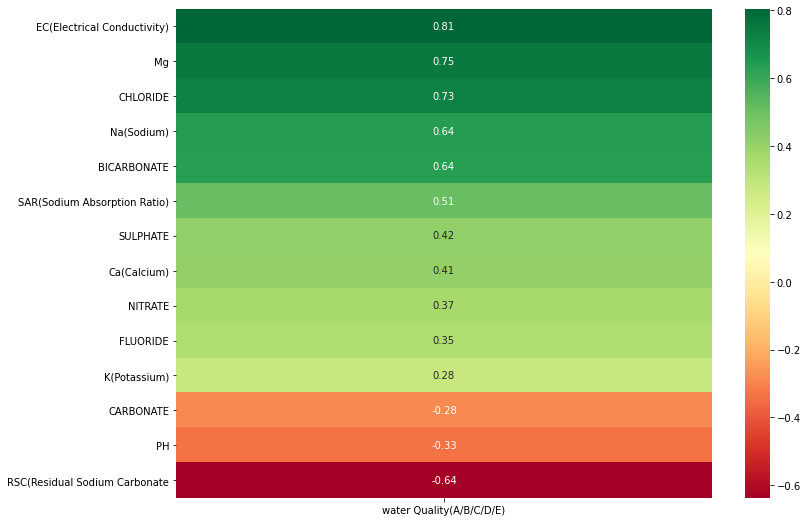

In [282]:
plt.figure(figsize=(12,9))
corr = corr[[target_column]].sort_values(by=[target_column], ascending=False)[1:]
g = sns.heatmap(corr ,annot=True,cmap="RdYlGn")